<a href="https://colab.research.google.com/github/akhildaram777/ML-lab/blob/main/ML_EX3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

dataset = pd.read_csv('/content/play_tennis dataset for ID3.csv')
X = dataset.iloc[:, 1:].values
# print(X)
attribute = ['outlook', 'temp', 'humidity', 'wind']


class Node(object):
    def __init__(self):
        self.value = None
        self.decision = None
        self.childs = None


def findEntropy(data, rows):
    yes = 0
    no = 0
    ans = -1
    idx = len(data[0]) - 1
    entropy = 0
    for i in rows:
        if data[i][idx] == 'Yes':
            yes = yes + 1
        else:
            no = no + 1

    x = yes/(yes+no)
    y = no/(yes+no)
    if x != 0 and y != 0:
        entropy = -1 * (x*math.log2(x) + y*math.log2(y))
    if x == 1:
        ans = 1
    if y == 1:
        ans = 0
    return entropy, ans






In [ ]:
def findMaxGain(data, rows, columns):
    maxGain = 0
    retidx = -1
    entropy, ans = findEntropy(data, rows)
    if entropy == 0:
        """if ans == 1:
            print("Yes")
        else:
            print("No")"""
        return maxGain, retidx, ans

    for j in columns:
        mydict = {}
        idx = j
        for i in rows:
            key = data[i][idx]
            if key not in mydict:
                mydict[key] = 1
            else:
                mydict[key] = mydict[key] + 1
        gain = entropy

        # print(mydict)
        for key in mydict:
            yes = 0
            no = 0
            for k in rows:
                if data[k][j] == key:
                    if data[k][-1] == 'Yes':
                        yes = yes + 1
                    else:
                        no = no + 1
            # print(yes, no)
            x = yes/(yes+no)
            y = no/(yes+no)
            # print(x, y)
            if x != 0 and y != 0:
                gain += (mydict[key] * (x*math.log2(x) + y*math.log2(y)))/14
        # print(gain)
        if gain > maxGain:
            # print("hello")
            maxGain = gain
            retidx = j

    return maxGain, retidx, ans


In [ ]:
def buildTree(data, rows, columns):

    maxGain, idx, ans = findMaxGain(X, rows, columns)
    root = Node()
    root.childs = []
    # print(maxGain
    #
    # )
    if maxGain == 0:
        if ans == 1:
            root.value = 'Yes'
        else:
            root.value = 'No'
        return root

    root.value = attribute[idx]
    mydict = {}
    for i in rows:
        key = data[i][idx]
        if key not in mydict:
            mydict[key] = 1
        else:
            mydict[key] += 1

    newcolumns = copy.deepcopy(columns)
    newcolumns.remove(idx)
    for key in mydict:
        newrows = []
        for i in rows:
            if data[i][idx] == key:
                newrows.append(i)
        # print(newrows)
        temp = buildTree(data, newrows, newcolumns)
        temp.decision = key
        root.childs.append(temp)
    return root


def traverse(root):
    print(root.decision)
    print(root.value)

    n = len(root.childs)
    if n > 0:
        for i in range(0, n):
            traverse(root.childs[i])


def calculate():
    rows = [i for i in range(0, 14)]
    columns = [i for i in range(0, 4)]
    root = buildTree(X, rows, columns)
    root.decision = 'Start'
    traverse(root)


calculate()

Start
outlook
Sunny
humidity
High
No
Normal
Yes
Overcast
Yes
Rain
wind
Weak
Yes
Strong
No


The accuracy is: 1.0


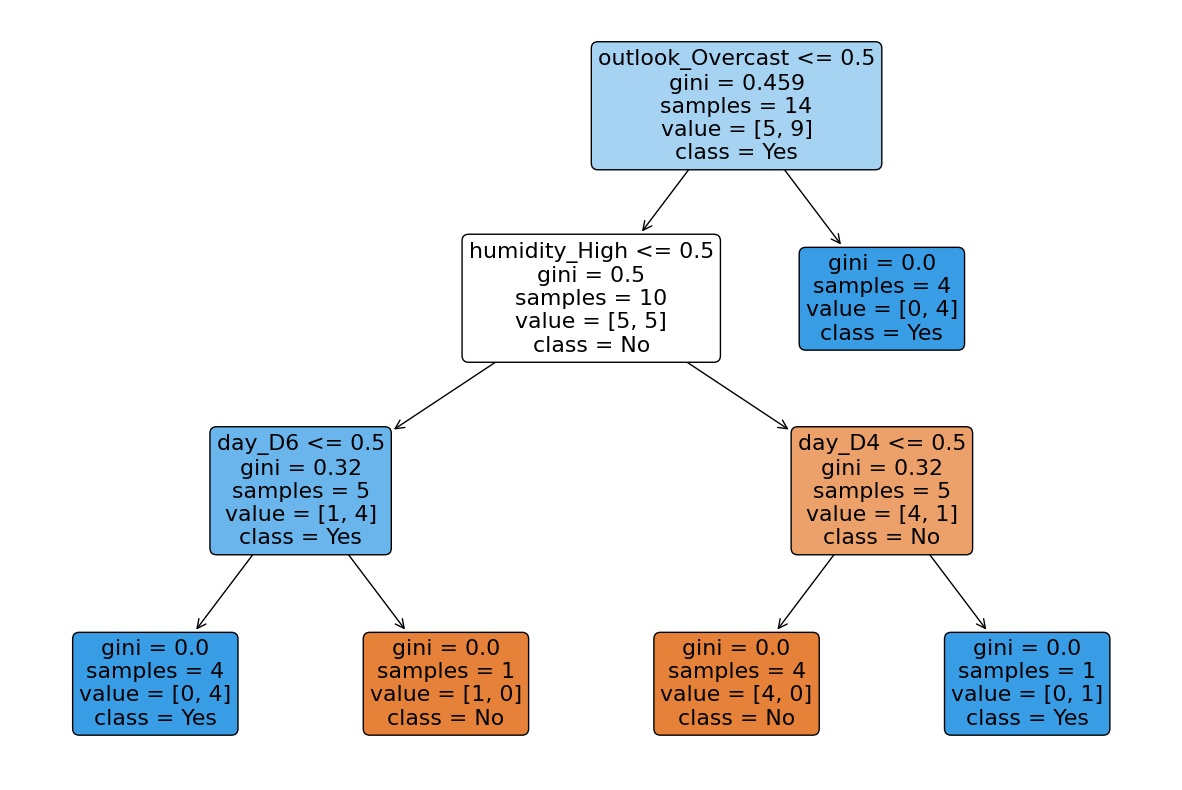

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import tree

# Load the data
df = pd.read_csv('/content/play_tennis dataset for ID3.csv')

# Split the data into features and target
X = df.drop('play', axis=1)
y = df['play']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Create the ID3 classifier
clf = tree.DecisionTreeClassifier()

# Train the classifier
clf.fit(X_encoded, y)

# Make predictions
y_pred = clf.predict(X_encoded)

# Calculate the accuracy
accuracy = metrics.accuracy_score(y, y_pred)

# Print the accuracy
print('The accuracy is:', accuracy)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=list(X_encoded.columns), class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()